In [23]:
##Import Required Libraries

In [105]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [106]:
# Load dataset
file_path = "Pokemon.csv.csv"
df = pd.read_csv("C:/Users/chinn/Downloads/Pokemon.csv.csv")


In [109]:
# Select numerical features
features = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Legendary"]
df_clean = df[features].copy()

# Convert boolean to integer
df_clean["Legendary"] = df_clean["Legendary"].astype(int)

In [111]:
# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clean)

In [113]:

# Define autoencoder architecture
input_dim = df_scaled.shape[1]

# Encoder
input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(6, activation='relu')(input_layer)
encoded = layers.Dense(3, activation='relu')(encoded)  # Bottleneck

# Decoder
decoded = layers.Dense(6, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [116]:

# Define the Autoencoder architecture
input_layer = layers.Input(shape=(df_scaled.shape[1],))  # Input layer with the same number of features as df_scaled
encoded = layers.Dense(32, activation='relu')(input_layer)  # Encoding layer with 32 nodes
decoded = layers.Dense(df_scaled.shape[1], activation='sigmoid')(encoded)  # Decoding layer to reconstruct the original input

# Create the autoencoder model
autoencoder = keras.Model(input_layer, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(df_scaled, df_scaled, epochs=95, batch_size=16, validation_split=0.1)

# Feature extraction (encoder part of the autoencoder)
encoder = keras.Model(input_layer, encoded)
encoded_features = encoder.predict(df_scaled)

# Anomaly detection using reconstruction error
reconstructed = autoencoder.predict(df_scaled)
reconstruction_error = np.mean(np.abs(df_scaled - reconstructed), axis=1)


Epoch 1/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0940 - val_loss: 0.0675
Epoch 2/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - val_loss: 0.0468
Epoch 3/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0461 - val_loss: 0.0362
Epoch 4/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0344 - val_loss: 0.0313
Epoch 5/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - val_loss: 0.0273
Epoch 6/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - val_loss: 0.0236
Epoch 7/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - val_loss: 0.0202
Epoch 8/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - val_loss: 0.0168
Epoch 9/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - val_loss: 0.0141
Epoch 10/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155 - val_loss: 0.0120
Epoch 11/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0104
Epoch 12/95
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - val_lo

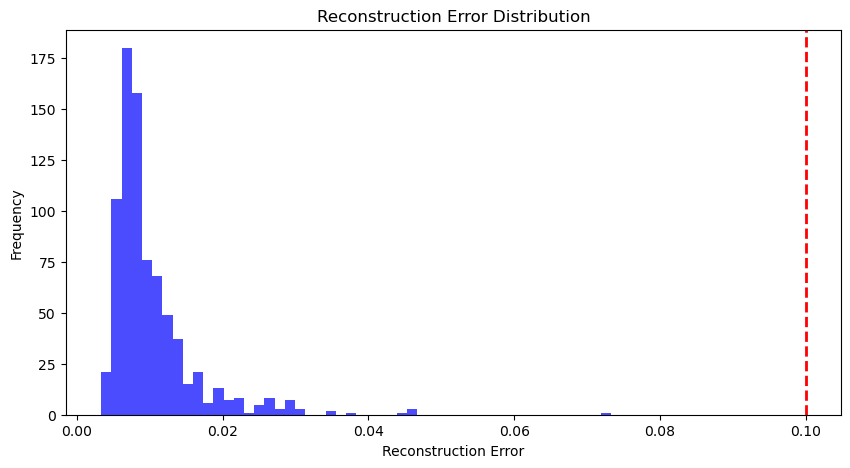

In [118]:
# Plot reconstruction error
def plot_anomalies(errors, threshold=0.1):
    plt.figure(figsize=(10, 5))
    plt.hist(errors, bins=50, alpha=0.7, color='blue')
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
    plt.title("Reconstruction Error Distribution")
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Frequency")
    plt.show()

plot_anomalies(reconstruction_error)


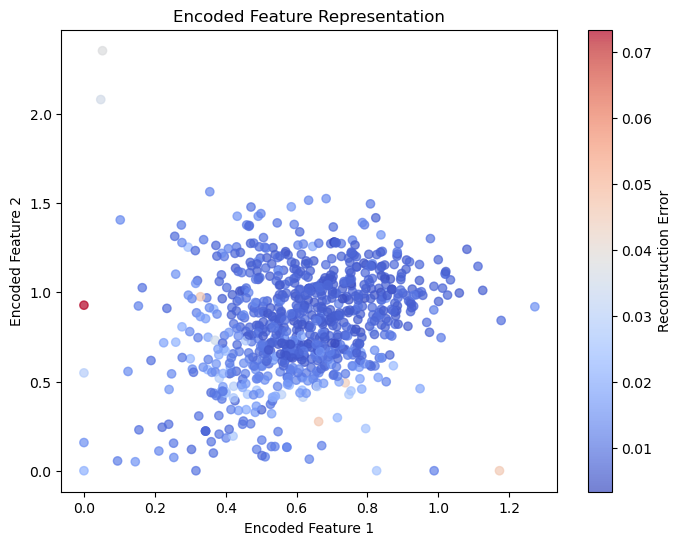

In [121]:
# Scatter plot of encoded features
def plot_encoded_features(features):
    plt.figure(figsize=(8, 6))
    plt.scatter(features[:, 0], features[:, 1], c=reconstruction_error, cmap='coolwarm', alpha=0.7)
    plt.colorbar(label='Reconstruction Error')
    plt.xlabel("Encoded Feature 1")
    plt.ylabel("Encoded Feature 2")
    plt.title("Encoded Feature Representation")
    plt.show()

plot_encoded_features(encoded_features)


In [123]:
#Flag anomalies
threshold = np.percentile(reconstruction_error, 95) #(top 5% anomalies)
anomalies = df[reconstruction_error > threshold]
print("Detected Anomalies:")
print(anomalies)


Detected Anomalies:
                      Name    Type 1    Type 2  Total   HP  Attack  Defense  \
13                Caterpie       Bug       NaN    195   45      30       35   
14                 Metapod       Bug       NaN    205   50      20       55   
16                  Weedle       Bug    Poison    195   40      35       30   
17                  Kakuna       Bug    Poison    205   45      25       50   
68                    Abra   Psychic       NaN    310   25      20       15   
121                Chansey    Normal       NaN    450  250       5        5   
125                 Horsea     Water       NaN    295   30      40       70   
139               Magikarp     Water       NaN    200   20      10       55   
163    MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   
164    MewtwoMega Mewtwo Y   Psychic       NaN    780  106     150       70   
186                  Pichu  Electric       NaN    205   20      40       15   
187                 Cleffa     F